In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

In [170]:
ruta = r'C:\Users\Usuario\Desktop\Estadistica\Isla1.xlsx'
ruta1 = r'C:\Users\Usuario\Desktop\Estadistica\Isla2.xlsx'

In [171]:
try:
    data1= pd.read_excel(ruta)
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta de destino")
try:        
    data2 = pd.read_excel(ruta1)
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta 1 de destino")

In [172]:
dataisland1=pd.DataFrame(data1)
dataisland1=dataisland1.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
dataisland2=pd.DataFrame(data2)
dataisland2=dataisland2.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
datatotal=pd.concat([dataisland1,dataisland2],ignore_index=True)#reiniciar el indice

In [173]:
def filtro (datatotal,tipodecombustible):
    filtro=datatotal["Producto"]==tipodecombustible
    datatotal=datatotal[filtro]
    return datatotal

In [174]:
tipodecombustible="CORRIENTE"
tabla=filtro(datatotal,tipodecombustible)
tabla=tabla.drop(["Producto"],axis=1)
tabla.reset_index(drop=True,inplace=True)


El coeficiente de correlación entre "Galones" y sí mismo (en la diagonal) es 1. Esto se debe a que cualquier variable tiene una correlación perfecta consigo misma.

El coeficiente de correlación entre "Galones" y "Valor Venta" es aproximadamente 0.993.

El coeficiente de correlación entre "Valor Venta" y sí mismo (en la diagonal) también es 1, como se mencionó anteriormente.

In [175]:
#ambas variables se relacionan obiamente galones y valor de venta son directamente porporcionales 
tabla.corr()

,Galones,Valor Venta
Galones,1.000000,0.992962
Valor Venta,0.992962,1.000000


In [176]:
x=tabla["Galones"]
y=tabla["Valor Venta"]
x.values.reshape(-1, 1)

array([[3.4480e+03],
       [2.6150e+03],
       [2.6350e+03],
       ...,
       [6.6200e-01],
       [6.6230e+03],
       [1.3245e+04]])

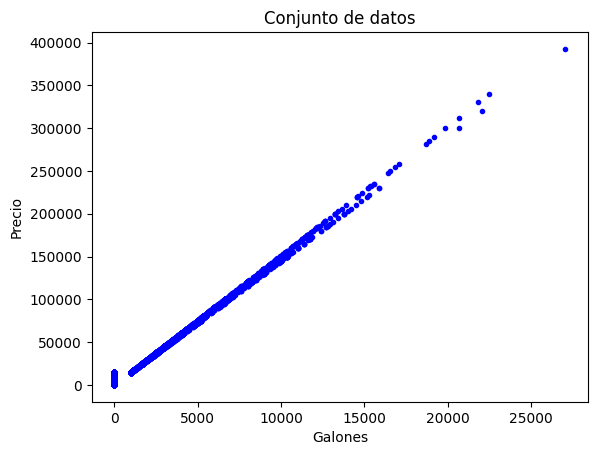

In [177]:
plt.plot(x,y,"b.")
plt.title("Conjunto de datos")
plt.xlabel("Galones")
plt.ylabel("Precio")
plt.show()

In [178]:
from sklearn.linear_model import LinearRegression



In [179]:
modelLineal=LinearRegression()
modelLineal.fit(x.values.reshape(-1, 1),y.values.reshape(-1, 1))

LinearRegression()

In [180]:
#Parámetro theta 0
modelLineal.intercept_


array([4504.19753863])

In [181]:
# Parámetro theta 1
modelLineal.coef_

array([[13.97567082]])

In [182]:
#utliza la variable x
minimo=min(x)
maximo=max(x)
X_min_max=np.array([minimo,maximo])

In [183]:
YPredict=modelLineal.predict(X_min_max.reshape(-1, 1))

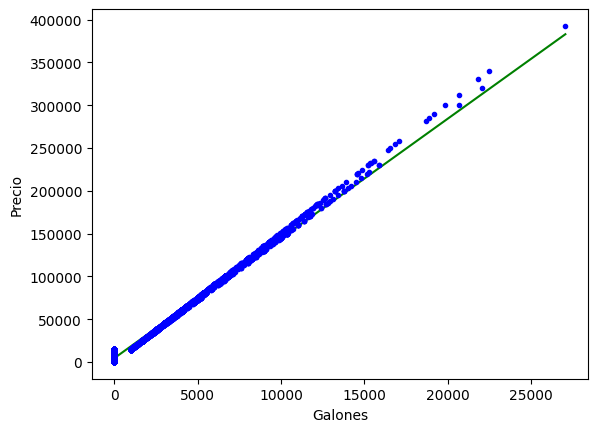

In [184]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, YPredict, "g-")
plt.plot(x,y,"b.")
plt.xlabel("Galones")
plt.ylabel("Precio")
plt.show()

In [193]:
xpredic = np.array([10000])
x_array = xpredic.reshape(-1, 1)  # Convirtiendo la Serie 'x' en un array NumPy
ypredict = modelLineal.predict(x_array)
print("El costo en pesos sería:", ypredict)

El costo en pesos sería: [[144260.90568881]]


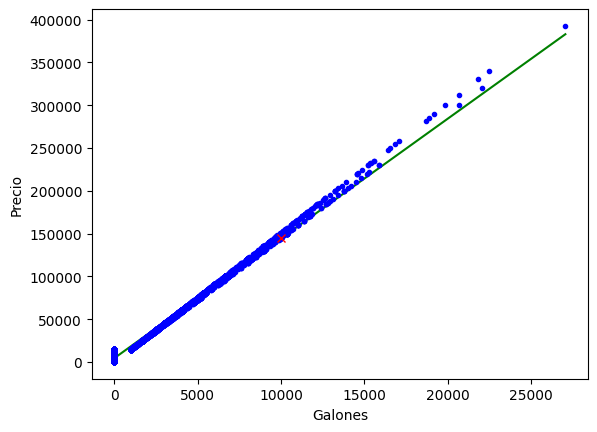

In [195]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, YPredict, "g-")
plt.plot(x,y,"b.")
plt.plot(xpredic, ypredict, "rx")
plt.xlabel("Galones")
plt.ylabel("Precio")
plt.show()